# Setting up Twitter API 

In [124]:
%matplotlib inline
import tweepy
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

In [125]:
consumer_key = 'XWPLe64D8Jn8xjZrSLIGbkMYS'
consumer_secret = 'GddzeZ3JtAWFesEIW0oIOYszXLM3DZvmJD2BbeUCF50PrkHfR6'

access_token = '62859544-M3yQ1sbVPkrKFNRQs7JvO6merixEyGlIJqf0GMSEt'
access_secret = 'zSaRFYstkZwU3y1WO4jPLabtayOMQSDMw7juvRABiZJt1'

Setting up authenitication to use Twitter's API

In [126]:
def twitter_setup():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth)
    return api

I collected 100 of the most recent "bitcoin" term-included tweets.

In [127]:
twitter_api = twitter_setup()
tweet_count = 100
tweets = twitter_api.search('bitcoin', count = tweet_count)
for tweet in tweets:
    print(tweet.text)
    print()

RT @hondadeal4vets: Can bitcoin get me top
()
RT @CNSSupport: CyberMonday FOREX VPS - 30% off Annual Plan!

The most secure &amp; connected VPS

Telephone support
Two-factor authentication…
()
RT @CNSSupport: CyberMonday FOREX VPS - 30% off Annual Plan!

The most secure &amp; connected VPS

Telephone support
Two-factor authentication…
()
RT @BTCTN: The Bitcoin Entanglement
 https://t.co/7AjJd5OMl9 #tbbt https://t.co/qsFMWJN1fc
()
Bitcoin is the new Pokémon Go: https://t.co/gZ1amhqYZf
()
RT @BTCTN: PR: Uservice Is a Global Decentralized Blockchain Platform for the Auto Industry https://t.co/nGybmJvFpp #Bitcoin https://t.co/7…
()
RT @Nadia__Rafiq: What is #Bitcoin and #BitcoinMining? 
https://t.co/4anFiP8CAw #Blockchain #Fintech #Mpgvip #Cryptocurrency #Defstar5 #AI…
()
RT @bitcoinist: Bitcoin Now Worth More Than Nike, Disney, McDonald’s, and IBM https://t.co/saajmQnH1O #bitcoin #blockchain #cryptocurrency
()
RT @kuriharan: Check. Deutsche Bank warns investors from #Bitcoin https://t.co/

In [128]:
twitter_data = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['OriginalTweets'])
display(twitter_data[-10:])

,OriginalTweets
90,RT @chengevelyn: Billionaire hedge fund manage...
91,RT @charliebilello: Bitcoin's market cap just ...
92,@JordanEliseo @Uber Chinese and Russians buyin...
93,RT @BTCTN: The Bitcoin Entanglement\n https://...
94,RARE FUNDED 0.1 BITCOIN / BITCOIN CASH LEALANA...
95,RT @intuitecon: What to hold going into #Bitco...
96,RT @afonichev_dev: Widget for displaying the c...
97,RT @alvinlindsay21: Bitcoin Mania Is Reaching ...
98,@PolyfoamPontiff You can't profit mining bitco...
99,RT @Cointelegraph: As #Bitcoin passes General ...


This is a list of all the attributes of data for a single tweet. These attributes help me isolate bits of information from each tweet to use as data for our algorithms later on.

In [129]:
#id, created_at, source, favorite_count, retweet_count, geo, 
#coordinates, entities
print(tweets[0])

Status(contributors=None, truncated=False, text=u'RT @hondadeal4vets: Can bitcoin get me top', is_quote_status=False, in_reply_to_status_id=None, id=935341461465452544, favorite_count=0, _api=<tweepy.api.API object at 0x7f429918bf90>, author=User(follow_request_sent=False, has_extended_profile=False, profile_use_background_image=False, _json={u'follow_request_sent': False, u'has_extended_profile': False, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 716613343, u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/598062586765049856/mCzPoGMg.jpg', u'verified': False, u'translator_type': u'none', u'profile_text_color': u'000000', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/931163396917088256/jhTWIb_j_normal.jpg', u'profile_sidebar_fill_color': u'000000', u'entities': {u'url': {u'urls': [{u'url': u'https://t.co/Ux6CO7kuQj', u'indices': [0, 23], u'expanded_url': u'http://IfYouDontGetcho.com', u'disp

# Preprocessing and Analyzing Tweet

In [130]:
display(twitter_data[-10:]["OriginalTweets"])

90    RT @chengevelyn: Billionaire hedge fund manage...
91    RT @charliebilello: Bitcoin's market cap just ...
92    @JordanEliseo @Uber Chinese and Russians buyin...
93    RT @BTCTN: The Bitcoin Entanglement\n https://...
94    RARE FUNDED 0.1 BITCOIN / BITCOIN CASH LEALANA...
95    RT @intuitecon: What to hold going into #Bitco...
96    RT @afonichev_dev: Widget for displaying the c...
97    RT @alvinlindsay21: Bitcoin Mania Is Reaching ...
98    @PolyfoamPontiff You can't profit mining bitco...
99    RT @Cointelegraph: As #Bitcoin passes General ...
Name: OriginalTweets, dtype: object

Here, I clean all the individual texts in the tweets that I have collected. This function goes through every tweet and goes through every word and converts it to lower case, removes any username and/or links, removes additional white spaces, and replaces hashtags with its word.

In [131]:
def clean_tweet(tweet):
    #' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet

After cleaning the tweet, I feed the preprocessed tweet into TextBlob which is a general sentiment analyzer which can be imported.

In [132]:
def analyze_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    tweet_sentiment = round(analysis.sentiment.polarity,4)
    return tweet_sentiment

In [133]:
tweets[0].text

u'RT @hondadeal4vets: Can bitcoin get me top'

Now that I've gotten the sentiment from the clean tweets, I put all of this data along with other attribute data from the tweets, into a Data Frame.

In [134]:
twitter_data['CleanTweets'] = np.array([clean_tweet(tweet.text) for tweet in tweets])
twitter_data['Sentiment'] = np.array([analyze_sentiment(tweet.text) for tweet in tweets])
display(twitter_data[-10:])

,OriginalTweets,CleanTweets,Sentiment
90,RT @chengevelyn: Billionaire hedge fund manage...,rt AT_USER billionaire hedge fund manager ken ...,0.0000
91,RT @charliebilello: Bitcoin's market cap just ...,rt AT_USER bitcoin's market cap just passed di...,0.0000
92,@JordanEliseo @Uber Chinese and Russians buyin...,AT_USER AT_USER chinese and russians buying go...,0.0000
93,RT @BTCTN: The Bitcoin Entanglement\n https://...,rt AT_USER the bitcoin entanglement URL tbbt URL,0.0000
94,RARE FUNDED 0.1 BITCOIN / BITCOIN CASH LEALANA...,rare funded 0.1 bitcoin / bitcoin cash lealana...,0.3000
95,RT @intuitecon: What to hold going into #Bitco...,rt AT_USER what to hold going into bitcoin $10...,0.2143
96,RT @afonichev_dev: Widget for displaying the c...,rt AT_USER widget for displaying the course of...,0.0000
97,RT @alvinlindsay21: Bitcoin Mania Is Reaching ...,rt AT_USER bitcoin mania is reaching a fever p...,0.0000
98,@PolyfoamPontiff You can't profit mining bitco...,AT_USER you can't profit mining bitcoin at hom...,0.0000
99,RT @Cointelegraph: As #Bitcoin passes General ...,rt AT_USER as bitcoin passes general electric ...,0.0500


In [135]:
#Creating datatable framework using some of values present in the tweet
def addmorefeatures(tweets):
    twitter_data['length'] = np.array([len(tweet.text) for tweet in tweets])
    twitter_data['ID'] = np.array([tweet.id for tweet in tweets])
    twitter_data['Date'] = np.array([tweet.created_at for tweet in tweets])
    twitter_data['Source'] = np.array([tweet.source for tweet in tweets])
    twitter_data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
    twitter_data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])
    return twitter_data
#twitter_data['Sentiment'] = np.array([TextBlob(tweet.text).sentiment for tweet in tweets])

In [136]:
twitter_data = addmorefeatures(tweets)
display(twitter_data[-10:])

,OriginalTweets,CleanTweets,Sentiment,length,ID,Date,Source,Likes,RTs
90,RT @chengevelyn: Billionaire hedge fund manage...,rt AT_USER billionaire hedge fund manager ken ...,0.0000,135,935341289385742338,2017-11-28 02:55:15,Twitter for iPhone,0,2
91,RT @charliebilello: Bitcoin's market cap just ...,rt AT_USER bitcoin's market cap just passed di...,0.0000,140,935341287896526848,2017-11-28 02:55:15,Twitter for iPhone,0,872
92,@JordanEliseo @Uber Chinese and Russians buyin...,AT_USER AT_USER chinese and russians buying go...,0.0000,74,935341287447736320,2017-11-28 02:55:15,Twitter for iPhone,0,0
93,RT @BTCTN: The Bitcoin Entanglement\n https://...,rt AT_USER the bitcoin entanglement URL tbbt URL,0.0000,90,935341286843760640,2017-11-28 02:55:15,Twitter for iPhone,0,142
94,RARE FUNDED 0.1 BITCOIN / BITCOIN CASH LEALANA...,rare funded 0.1 bitcoin / bitcoin cash lealana...,0.3000,81,935341286290321409,2017-11-28 02:55:15,IFTTT,0,0
95,RT @intuitecon: What to hold going into #Bitco...,rt AT_USER what to hold going into bitcoin $10...,0.2143,140,935341284255989760,2017-11-28 02:55:14,Twitter for iPhone,0,2
96,RT @afonichev_dev: Widget for displaying the c...,rt AT_USER widget for displaying the course of...,0.0000,140,935341283308113920,2017-11-28 02:55:14,Twitter Web Client,0,688
97,RT @alvinlindsay21: Bitcoin Mania Is Reaching ...,rt AT_USER bitcoin mania is reaching a fever p...,0.0000,119,935341282951680000,2017-11-28 02:55:14,Twitter for Android,0,4
98,@PolyfoamPontiff You can't profit mining bitco...,AT_USER you can't profit mining bitcoin at hom...,0.0000,90,935341282318315520,2017-11-28 02:55:14,TweetDeck,0,0
99,RT @Cointelegraph: As #Bitcoin passes General ...,rt AT_USER as bitcoin passes general electric ...,0.0500,116,935341279050944513,2017-11-28 02:55:13,Twitter Web Client,0,42


# Stats and Visualization

In [137]:
mean = np.mean(twitter_data['length'])
likes_max = np.max(twitter_data['Likes'])
print('mean = ' + str(mean))
print('max likes = ' + str(likes_max))

mean = 114.73
max likes = 2


In [139]:
fav_max = np.max(twitter_data['Likes'])
rt_max = np.max(twitter_data['RTs'])

fav = twitter_data[twitter_data == fav_max].index[0]
rt = twitter_data[twitter_data == rt_max].index[0]

print("Tweet with most likes is " + str(twitter_data['OriginalTweets'][fav]))
print("Number of likes: " + str(fav_max))
print(str(twitter_data['length'][fav]) + " characters")
print('')
print("Tweet with most retweets is " + str(twitter_data['OriginalTweets'][rt]))
print("Number of retweets: " + str(rt_max))
print(str(twitter_data['length'][rt]) + " characters")

Tweet with most likes is RT @hondadeal4vets: Can bitcoin get me top
Number of likes: 2
42 characters

Tweet with most retweets is RT @hondadeal4vets: Can bitcoin get me top
Number of retweets: 8927
42 characters


Time Series

In [140]:
time_length = pd.Series(data = twitter_data['length'].values, index = twitter_data['Date'])
time_fav = pd.Series(data = twitter_data['Likes'].values, index = twitter_data['Date'])
time_rt = pd.Series(data = twitter_data['RTs'].values, index = twitter_data['Date'])

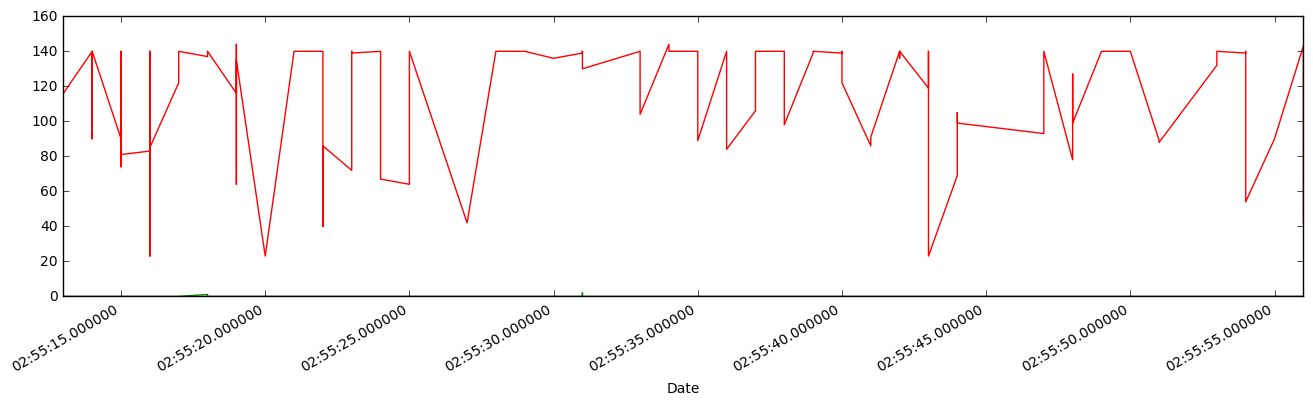

In [141]:
time_length.plot(figsize = (16, 4), color = 'r')
time_fav.plot(figsize = (16,4), color = 'g')
#time_rt.plot(figsize = (16,4), color = 'b')

Pie Graph for SA of tweet collection

In [142]:
SAs =['Positive', 'Neutral', 'Negative']
for sa in SAs:
    print(sa)

Positive
Neutral
Negative


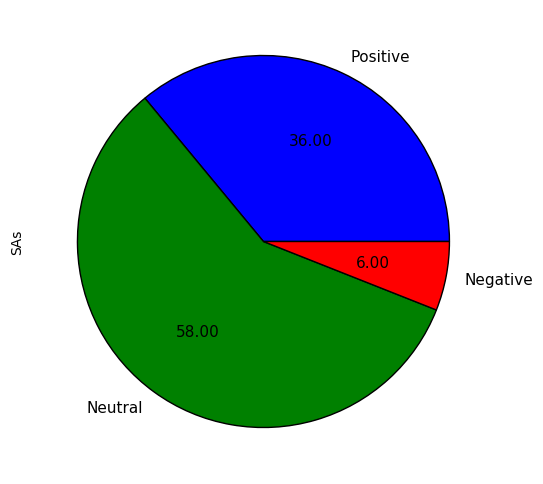

In [143]:
percent = np.zeros(len(SAs))

for sa in twitter_data['Sentiment']:
    if sa == 0.0000:
        sa = 'Neutral'
    elif sa > 0.0000:
        sa = 'Positive'
    else: 
        sa = 'Negative'
    for index in range(len(SAs)):
        if sa == SAs[index]:
            percent[index] += 1
            pass
percent /= (tweet_count/len(SAs))

pie_chart = pd.Series(percent, index = SAs, name = 'SAs')
pie_chart.plot.pie(fontsize = 11, autopct = '%.2f', figsize = (6,6))

In [69]:
pos_tweets = [ tweet for index, tweet in enumerate(twitter_data['OriginalTweets']) if twitter_data['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(twitter_data['OriginalTweets']) if twitter_data['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(twitter_data['OriginalTweets']) if twitter_data['Sentiment'][index] < 0]

In [75]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets) * 100/len(twitter_data['OriginalTweets'])))
print("Percentage neutral tweets: {}%".format(len(neu_tweets) * 100 / len(twitter_data['OriginalTweets'])))
print("Percentage negative tweets: {}%".format(len(neg_tweets) * 100 / len(twitter_data['OriginalTweets'])))

Percentage of positive tweets: 52%
Percentage neutral tweets: 41%
Percentage negative tweets: 7%


Pie Graph for sources of tweet collection

In [66]:
sources = []
for source in twitter_data['Source']:
    if source not in sources:
        sources.append(source)
        
for source in sources:
    print(source)

Twitter for Android
Twitter Web Client
Twitter for iPhone
Twitter Lite
TweetDeck
New Block Tweets
Coin Spectator
twicca
CryptoSpeaker
IFTTT
StartupUSATato
TheEmotiBot
BitCoinNewEN
wuweitactic
Twitter for iPad
cryptominingnews
PrometheusII
Google
WordPress.com


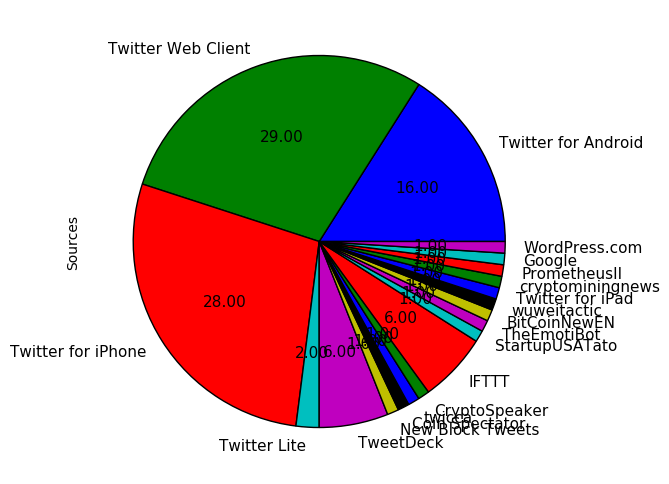

In [67]:
percent = np.zeros(len(sources))

for source in twitter_data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
percent /= (tweet_count/len(sources)) #number of tweets collected divided by number of types of sources

pie_chart = pd.Series(percent, index = sources, name = 'Sources')
pie_chart.plot.pie(fontsize = 11, autopct = '%.2f', figsize = (6,6))